<html>
  <h1  align="center";> Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
  </h1>
<hr>
  <h3 align="center";>
  Edición 2022
  </h3>
<hr>
  <h1 align="center";>
  Trabajo Práctico Entregable
  </h1>
  <h2 align="center";>
  Parte 2
  </h2>
</html>

## Profesora del Práctico:
- Fonseca, Rocio

## Integrantes [Grupo 5]:
- Argüello, Leandro Ismael
- Corral, Diego
- Racciatti. Florencia
- Rinaudo, Eleana
- Romero, Ernest

<html>
<hr>
  <h1  align="center";>
    Análisis Exploratorio y Curación de Datos
  </h1>
</html>

# Importación de librerías

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

### Ejercicio 1.1

Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

In [ ]:
url = r"https://raw.githubusercontent.com/eleanarinaudo/Diplo2022_Grupo-5/main/Notebooks/An%C3%A1lisis%20Exploratorio%20y%20Curaci%C3%B3n%20de%20Datos/csv/melb_data_extended.csv"
df_extend = pd.read_csv(url)
df_extend_copy = df_extend.copy()
df_extend_copy.columns.to_list()
df_extend_copy.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.0,3067.0,...,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.0,3067.0,...,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.0,3067.0,...,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.0,3067.0,...,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.0,3067.0,...,Yarra,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_extend_copy.isnull().sum()


Suburb                          0
Address                         0
Rooms                           0
Type                            0
Price                           0
Method                          0
SellerG                         0
Date                            0
Distance                        0
Postcode                        0
Bedroom2                        0
Bathroom                        0
Car                             0
Landsize                        0
BuildingArea                 4217
YearBuilt                    3564
CouncilArea                   746
Lattitude                       0
Longtitude                      0
Regionname                      0
Propertycount                   0
zipcode                      4126
airbnb_record_count          4126
airbnb_price_mean            4126
airbnb_weekly_price_mean     4178
airbnb_monthly_price_mean    4126
dtype: int64

Quitamos las columnas

In [ ]:
df_extend_filtered = df_extend_copy.drop(
    columns=[
        "Address",
        "Method",
        "CouncilArea",
        "YearBuilt",
        "BuildingArea",
        "SellerG",
    ],
    inplace=False,
)
df_extend_filtered.head(1)


,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3/12/2016,2.0,3067.0,2.0,1.0,1.0,202.0,-38.0,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN


### Ejercicio 1.2 
Aplicar una codificación **One-hot encoding** a cada fila, tanto para variables numéricas como categóricas.

Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

In [ ]:
df_extend_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Suburb                     8759 non-null   object 
 1   Rooms                      8759 non-null   int64  
 2   Type                       8759 non-null   object 
 3   Price                      8759 non-null   float64
 4   Date                       8759 non-null   object 
 5   Distance                   8759 non-null   float64
 6   Postcode                   8759 non-null   float64
 7   Bedroom2                   8759 non-null   float64
 8   Bathroom                   8759 non-null   float64
 9   Car                        8759 non-null   float64
 10  Landsize                   8759 non-null   float64
 11  Lattitude                  8759 non-null   float64
 12  Longtitude                 8759 non-null   float64
 13  Regionname                 8759 non-null   objec

In [ ]:
cat_cols = ["Suburb", "Type", "Regionname", "Date"]
num_cols = [
  'Rooms',
  'Price',
  'Distance',
  'Postcode',
  'Bedroom2',
  'Bathroom',
  'Car',
  'Landsize',
  'Propertycount'
] # No incluimos en el análisis las columnas de airbnb que contienen valores nulos y se genera un conflicto al aplicar el método PCA. 
new_columns = []

In [ ]:
df_extend_filtered[cat_cols].nunique()


Suburb        222
Type            3
Regionname      5
Date           58
dtype: int64

In [ ]:
df_extend_filtered[cat_cols].isna().sum()


Suburb        0
Type          0
Regionname    0
Date          0
dtype: int64

In [ ]:
max_values = 30
categories = [
    df_extend_filtered[col].value_counts()[:max_values].index.values for col in cat_cols
]
categories


[array(['Bentleigh East', 'Reservoir', 'Preston', 'Richmond', 'Brunswick',
        'Coburg', 'Essendon', 'Pascoe Vale', 'Yarraville', 'Northcote',
        'Moonee Ponds', 'Newport', 'South Yarra', 'Thornbury',
        'Ascot Vale', 'Port Melbourne', 'Glenroy', 'Bentleigh',
        'Keilor East', 'Carnegie', 'Glen Iris', 'Prahran', 'Sunshine',
        'Hawthorn', 'Brighton', 'Brighton East', 'Footscray', 'Kew',
        'Fawkner', 'Elwood'], dtype=object),
 array(['h', 'u', 't'], dtype=object),
 array(['Northern Metropolitan', 'Southern Metropolitan',
        'Western Metropolitan', 'Eastern Metropolitan',
        'South-Eastern Metropolitan'], dtype=object),
 array(['27/05/2017', '27/11/2016', '3/06/2017', '4/03/2017', '10/12/2016',
        '25/02/2017', '17/06/2017', '12/08/2017', '15/10/2016',
        '12/11/2016', '18/03/2017', '24/06/2017', '29/07/2017',
        '8/04/2017', '8/10/2016', '20/05/2017', '19/11/2016', '3/12/2016',
        '24/09/2016', '17/09/2016', '22/07/2017', '8/07

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories=categories, handle_unknown="ignore")
encoder.fit(df_extend_filtered[cat_cols])

X_melb = encoder.transform(df_extend_filtered[cat_cols]).todense()
X_melb = np.hstack([X_melb, df_extend_filtered[num_cols]])
X_melb.shape


(8759, 82)

In [ ]:
encoder.get_feature_names()


array(['x0_Bentleigh East', 'x0_Reservoir', 'x0_Preston', 'x0_Richmond',
       'x0_Brunswick', 'x0_Coburg', 'x0_Essendon', 'x0_Pascoe Vale',
       'x0_Yarraville', 'x0_Northcote', 'x0_Moonee Ponds', 'x0_Newport',
       'x0_South Yarra', 'x0_Thornbury', 'x0_Ascot Vale',
       'x0_Port Melbourne', 'x0_Glenroy', 'x0_Bentleigh',
       'x0_Keilor East', 'x0_Carnegie', 'x0_Glen Iris', 'x0_Prahran',
       'x0_Sunshine', 'x0_Hawthorn', 'x0_Brighton', 'x0_Brighton East',
       'x0_Footscray', 'x0_Kew', 'x0_Fawkner', 'x0_Elwood', 'x1_h',
       'x1_u', 'x1_t', 'x2_Northern Metropolitan',
       'x2_Southern Metropolitan', 'x2_Western Metropolitan',
       'x2_Eastern Metropolitan', 'x2_South-Eastern Metropolitan',
       'x3_27/05/2017', 'x3_27/11/2016', 'x3_3/06/2017', 'x3_4/03/2017',
       'x3_10/12/2016', 'x3_25/02/2017', 'x3_17/06/2017', 'x3_12/08/2017',
       'x3_15/10/2016', 'x3_12/11/2016', 'x3_18/03/2017', 'x3_24/06/2017',
       'x3_29/07/2017', 'x3_8/04/2017', 'x3_8/10/2016', 

In [ ]:
X_melb


matrix([[   0.,    0.,    0., ...,   nan,   nan,   nan],
        [   0.,    0.,    0., ...,   nan,   nan,   nan],
        [   0.,    0.,    0., ...,   nan,   nan,   nan],
        ...,
        [   0.,    0.,    0., ...,  107.,  612., 2120.],
        [   0.,    0.,    0., ...,  107.,  612., 2120.],
        [   0.,    0.,    0., ...,   nan,   nan,   nan]])

### Ejercicio 2.1
Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.

Usamos el `df` sin codificar

In [ ]:
melb_data_mice = df_extend_copy.copy(deep=True)


In [ ]:
df_extend_copy.YearBuilt


0          NaN
1       1900.0
2       1900.0
3          NaN
4       2014.0
         ...  
8754       NaN
8755    1981.0
8756    1995.0
8757    1997.0
8758    1920.0
Name: YearBuilt, Length: 8759, dtype: float64

In [ ]:
df_extend_copy.BuildingArea


0         NaN
1        79.0
2       150.0
3         NaN
4       142.0
        ...  
8754      NaN
8755      NaN
8756    133.0
8757      NaN
8758    112.0
Name: BuildingArea, Length: 8759, dtype: float64

### Ejercicio 2.2
Aplique una instancia de IterativeImputer con un estimador KNeighborsRegressor para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

StandardScaler

In [ ]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

melb_data_mice["yearB_scaled"] = StandardScaler().fit_transform(
    melb_data_mice[["YearBuilt"]]
)
melb_data_mice["buildingA_scaled"] = StandardScaler().fit_transform(
    melb_data_mice[["BuildingArea"]]
)
melb_data_mice[
    ["yearB_scaled_imputed", "building_area_scaled_imputed"]
] = mice_imputer.fit_transform(melb_data_mice[["yearB_scaled", "buildingA_scaled"]])


In [ ]:
df_extend_copy.YearBuilt


0          NaN
1       1900.0
2       1900.0
3          NaN
4       2014.0
         ...  
8754       NaN
8755    1981.0
8756    1995.0
8757    1997.0
8758    1920.0
Name: YearBuilt, Length: 8759, dtype: float64

#### Gráfico de `YearBuilt`

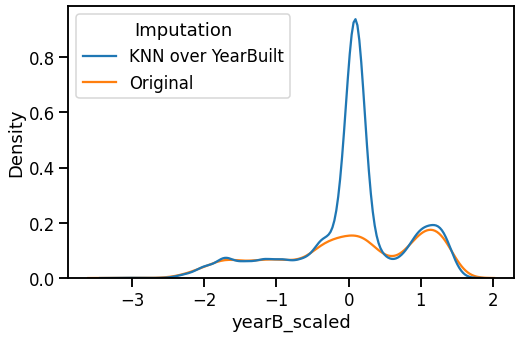

In [ ]:
mice_year_built = melb_data_mice.yearB_scaled_imputed.to_frame().rename(
    columns={"yearB_scaled_imputed": "yearB_scaled"}
)
mice_year_built["Imputation"] = "KNN over YearBuilt"

melb_year_build = melb_data_mice.yearB_scaled.dropna().to_frame()
melb_year_build["Imputation"] = "Original"

data = pd.concat([mice_year_built, melb_year_build], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x="yearB_scaled", hue="Imputation")


In [ ]:
data


,yearB_scaled,Imputation
0,0.089632,KNN over YearBuilt
1,-1.715424,KNN over YearBuilt
2,-1.715424,KNN over YearBuilt
3,0.089632,KNN over YearBuilt
4,1.365062,KNN over YearBuilt
...,...,...
13949,0.446320,Original
13950,0.473342,Original
13951,0.851647,Original
13952,0.905691,Original


#### Gráfico de `BuildingArea`

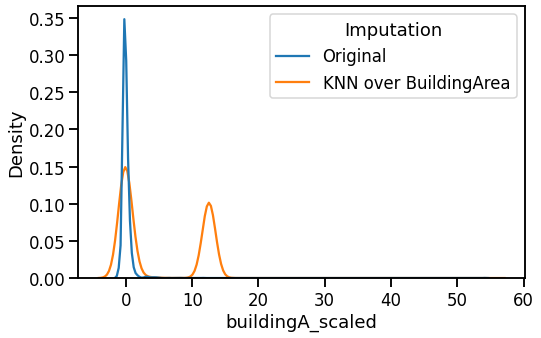

In [ ]:
mice_BuildingArea = melb_data_mice.building_area_scaled_imputed.to_frame().rename(
    columns={"building_area_scaled_imputed": "buildingA_scaled"}
)
mice_BuildingArea["Imputation"] = "KNN over BuildingArea"

melb_BuildingArea = melb_data_mice.buildingA_scaled.dropna().to_frame()
melb_BuildingArea["Imputation"] = "Original"

data = pd.concat([melb_BuildingArea, mice_BuildingArea], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x="buildingA_scaled", hue="Imputation")


In [ ]:
X_melb_scaled = StandardScaler().fit_transform(X_melb)
X_melb_complete = np.hstack(
    [
        X_melb_scaled,
        melb_data_mice[["yearB_scaled", "building_area_scaled_imputed"]].values,
    ]
)


In [ ]:
full_imputer = IterativeImputer(random_state=32, estimator=KNeighborsRegressor())
X_melb_complete_imputed = full_imputer.fit_transform(X_melb_complete)


### `YearBuilt` Imputado

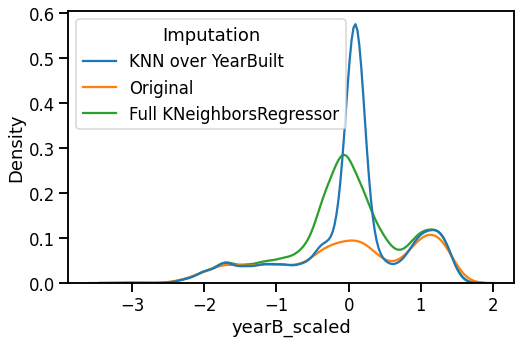

In [ ]:
full_imputed = pd.DataFrame(
    data={
        "yearB_scaled": X_melb_complete_imputed[:, -2],
        "Imputation": "Full KNeighborsRegressor",
    }
)
data = pd.concat([mice_year_built, melb_year_build, full_imputed], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x="yearB_scaled", hue="Imputation")


### `BuildingArea` Imputado

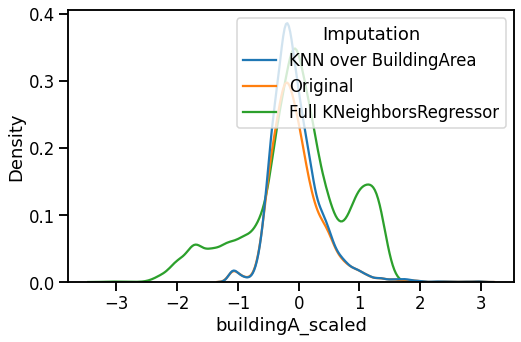

In [ ]:
full_imputed = pd.DataFrame(
    data={
        "buildingA_scaled": X_melb_complete_imputed[:, -2],
        "Imputation": "Full KNeighborsRegressor",
    }
)
data = pd.concat(
    [mice_BuildingArea, melb_BuildingArea, full_imputed], ignore_index=True
)
data = data[data.buildingA_scaled < 3]
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x="buildingA_scaled", hue="Imputation")


In [ ]:
X_melb_complete_imputed[1]


array([-0.15938597, -0.15938597, -0.15711186, -0.151686  , -0.14566929,
       -0.13898939, -0.13019647, -0.12791053, -0.12652045, -0.12558572,
       -0.11534308, -0.11432247, -0.11432247, -0.11329315, -0.11277514,
       -0.11277514, -0.11120739, -0.11015043, -0.10854664, -0.10746477,
       -0.10637241, -0.10471348, -0.10415488, -0.10302901, -0.10074111,
       -0.10074111, -0.10074111, -0.09957826, -0.09840222, -0.0972125 ,
        0.6445786 , -0.4772656 , -0.34796588,  1.46037309, -0.68098211,
       -0.58073394, -0.32910986, -0.1193428 , -0.18537709, -0.17105465,
       -0.16712568, -0.16274339, -0.1620027 , -0.16163121, -0.1586312 ,
       -0.1582526 , -0.15596359, -0.15480761, -0.15403259, -0.151686  ,
       -0.15010309, -0.1485048 , -0.14810277, -0.14689064, -0.14566929,
       -0.14526008, -0.14526008, -0.14484981, -0.14361254, -0.14236541,
       -0.13984044, -0.13941551, -0.13856205, -0.13856205, -0.13813349,
       -0.13509837, -0.13421951, -0.13421951, -1.19137069,  0.16

In [ ]:
if X_melb_complete_imputed.shape[0] < len(df_extend_filtered):
    melb_df_sample = df_extend_filtered.iloc[: X_melb_complete_imputed.shape[0]]
else:
    melb_df_sample = df_extend_filtered


In [ ]:
X_melb_complete_imputed.shape


(8759, 84)

### Ejercicio 3.1 
Aplique PCA para obtener n componentes principales de la matriz, donde `n = min(20, X.shape[0])`. 

**¿Es necesario estandarizar o escalar los datos?**

Lo escalamos con el `MAXMINSCALER`

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_dense_feature_matrix = scaler.fit_transform(X_melb_complete_imputed)
np.min(scaled_dense_feature_matrix), np.max(scaled_dense_feature_matrix)


(-1.0, 1.0000000000000002)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=min(20, X_melb_complete_imputed.shape[0]))
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape


(8759, 20)

In [ ]:
proyected_features.dtype


dtype('float64')

In [ ]:
pca.explained_variance_ratio_


array([0.1738196 , 0.11216469, 0.09912934, 0.05552839, 0.04564789,
       0.03281243, 0.02813662, 0.023414  , 0.01914002, 0.01419817,
       0.01351515, 0.01072703, 0.010478  , 0.01003447, 0.00912822,
       0.00865959, 0.00832317, 0.00828695, 0.00799688, 0.00782578])

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
stdandard_dense_feature_matrix = std_scaler.fit_transform(X_melb_complete_imputed)
np.min(stdandard_dense_feature_matrix), np.max(stdandard_dense_feature_matrix)


(-3.9387995205088546, 10.286742592810015)

In [ ]:
pca_std = PCA(n_components=min(20, X_melb_complete_imputed.shape[0]))
pca_std.fit(stdandard_dense_feature_matrix)
proyected_features_std = pca.transform(stdandard_dense_feature_matrix)
proyected_features_std.shape


(8759, 20)

In [ ]:
pca_std.explained_variance_ratio_


array([0.05524283, 0.04427286, 0.0360507 , 0.03102654, 0.02635813,
       0.02187561, 0.01795949, 0.01563672, 0.0141116 , 0.01352109,
       0.01316736, 0.01298538, 0.01286777, 0.01276675, 0.01268166,
       0.01262263, 0.01254844, 0.01244452, 0.0123603 , 0.01228635])

In [ ]:
proyected_features_std


array([[-1.78955760e-02,  1.69796179e+00, -1.20466557e+00, ...,
        -2.00677297e-01, -9.34279667e-02,  4.59203083e-01],
       [-1.33101800e-01,  2.24228994e+00, -1.04546840e+00, ...,
        -4.43041121e-01,  4.26791785e-01, -2.75251841e-01],
       [-5.09473849e-01,  1.34944463e+00, -1.23202745e+00, ...,
         4.63635618e+00,  1.12322507e-01, -8.94997476e-02],
       ...,
       [-1.33155033e+00, -3.18333494e-03,  1.97946308e+00, ...,
        -3.35200920e-02,  1.65028020e-01, -1.88481245e-01],
       [-1.54099754e+00, -4.64305733e-01,  1.86846153e+00, ...,
         1.96125785e-01,  9.23183371e-02, -1.78519085e-01],
       [-1.85280557e+00, -2.56495576e-01,  1.82990251e+00, ...,
         7.75877522e-01,  7.99900579e-02,  3.88233226e-01]])

### Ejercicio 3.2 

Grafique la varianza capturada por los primeros  n  componentes principales, para cada n.

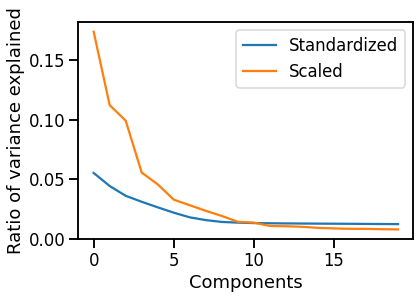

In [ ]:
sns.lineplot(
    x=range(pca_std.n_components),
    y=pca_std.explained_variance_ratio_,
    label="Standardized",
)
sns.lineplot(x=range(pca.n_components), y=pca.explained_variance_ratio_, label="Scaled")
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()


### Ejercicio 3.3 

En base al gráfico, seleccione las primeras  m  columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
melb_df_sample[["pca1_standard", "pca2_standard"]] = proyected_features_std[:, :2]


In [ ]:
melb_df_sample[["pca1_standard", "pca2_standard"]].head(2)


,pca1_standard,pca2_standard
0,-0.017896,1.697962
1,-0.133102,2.242290


In [ ]:
melb_df_sample


,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,...,Longtitude,Regionname,Propertycount,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,pca1_standard,pca2_standard
0,Abbotsford,2,h,1480000.0,3/12/2016,2.0,3067.0,2.0,1.0,1.0,...,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN,-0.017896,1.697962
1,Abbotsford,2,h,1035000.0,4/02/2016,2.0,3067.0,2.0,1.0,0.0,...,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN,-0.133102,2.242290
2,Abbotsford,3,h,1465000.0,4/03/2017,2.0,3067.0,3.0,2.0,0.0,...,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN,-0.509474,1.349445
3,Abbotsford,3,h,850000.0,4/03/2017,2.0,3067.0,3.0,2.0,1.0,...,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN,-0.382718,1.735757
4,Abbotsford,4,h,1600000.0,4/06/2016,2.0,3067.0,3.0,1.0,2.0,...,145.0,Northern Metropolitan,4019.0,NaN,NaN,NaN,NaN,NaN,-0.476344,1.094484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,Westmeadows,3,h,582000.0,26/08/2017,16.0,3049.0,3.0,2.0,2.0,...,145.0,Northern Metropolitan,2474.0,NaN,NaN,NaN,NaN,NaN,-0.837315,0.977513
8755,Wheelers Hill,4,h,1245000.0,26/08/2017,17.0,3150.0,4.0,2.0,2.0,...,145.0,South-Eastern Metropolitan,7392.0,NaN,NaN,NaN,NaN,NaN,0.087240,-2.488537
8756,Williamstown,3,h,1031000.0,26/08/2017,7.0,3016.0,3.0,2.0,2.0,...,145.0,Western Metropolitan,6380.0,3016.0,4.0,107.0,612.0,2120.0,-1.331550,-0.003183
8757,Williamstown,3,h,1170000.0,26/08/2017,7.0,3016.0,3.0,2.0,4.0,...,145.0,Western Metropolitan,6380.0,3016.0,4.0,107.0,612.0,2120.0,-1.540998,-0.464306


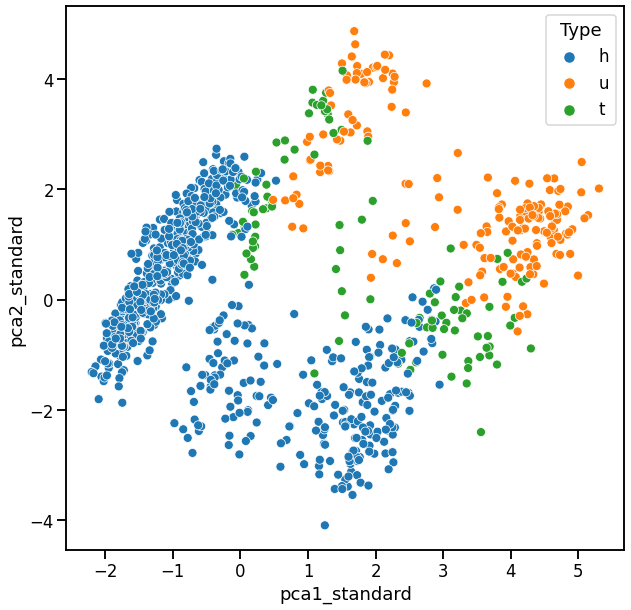

In [ ]:
data = melb_df_sample.sample(1000)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x="pca1_standard", y="pca2_standard", hue="Type")


### Ejercicio 4 

Transformar nuevamente el conjunto de datos procesado en un pandas.DataFrame y guardarlo en un archivo.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder


In [ ]:
cat_cols = ["Suburb", "Type", "Regionname", "Date"]
num_cols = [
    "Rooms",
    "Price",
    "Distance",
    "Postcode",
    "Bedroom2",
    "Bathroom",
    "Car",
    "Landsize",
    "Propertycount",
]
new_columns = []


Encode columnas categoricas.

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_cat = encoder.fit_transform(df_extend_filtered[cat_cols])

for col, col_values in zip(cat_cols, encoder.categories_):
    for col_value in col_values:
        new_columns.append("{}={}".format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))


Matrix has shape (8759, 288), with columns: ['Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Attwood', 'Suburb=Avondale Heights', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=Brooklyn', 'Suburb=Brunswick', 'Suburb=Brunswick East', 'Suburb=Brunswick West', 'Suburb=Bulleen', 'Suburb=Bundoora', 'Suburb=Burnley', 'Suburb=Burnside', 'Suburb=Burnside Heights', 'Suburb=Burwood', 'Suburb=Burwood East', 'Suburb=Ca

Agregamos las columnas numericas

In [ ]:
# Step 2: Append the numerical columns
X = np.hstack([X_cat, df_extend_filtered[num_cols].values])
new_columns.extend(num_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))


Matrix has shape (8759, 288), with columns: ['Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Attwood', 'Suburb=Avondale Heights', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=Brooklyn', 'Suburb=Brunswick', 'Suburb=Brunswick East', 'Suburb=Brunswick West', 'Suburb=Bulleen', 'Suburb=Bundoora', 'Suburb=Burnley', 'Suburb=Burnside', 'Suburb=Burnside Heights', 'Suburb=Burwood', 'Suburb=Burwood East', 'Suburb=Ca

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_dense_feature_matrix = scaler.fit_transform(X)
np.min(scaled_dense_feature_matrix), np.max(scaled_dense_feature_matrix)


(-1.0, 1.0000000000000002)

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
X_pca = np.hstack([X, proyected_features])
new_columns.extend(["pca1", "pca2"])


In [ ]:
processed_melb_df = pd.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()


,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,...,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Propertycount,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1480000.0,2.0,3067.0,2.0,1.0,1.0,202.0,4019.0,-0.719390,1.404970
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1035000.0,2.0,3067.0,2.0,1.0,0.0,156.0,4019.0,-0.637134,1.596757
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1465000.0,2.0,3067.0,3.0,2.0,0.0,134.0,4019.0,-0.796241,1.250605
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,850000.0,2.0,3067.0,3.0,2.0,1.0,94.0,4019.0,-0.758925,1.374786
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1600000.0,2.0,3067.0,3.0,1.0,2.0,120.0,4019.0,-0.931709,1.154521
